# Part II - (Gorkha 2015 Earthquake Dataset Exploration)
## by (Sekinat Oyero)



## Investigation Overview

In this presentation, I would like to anwer the folllowing questions 

> 1. What's the relationship between height of building, age and damage grade?
> 2. Which superstructure material poses more threat ?
> 3. Does secondary use has effect on damage grade?


## Dataset Overview

This dataset contains the household survey of the 7.8Mw earthquake that happened in Gorkha region in April, 2015. It gives information about the 260601 building structures and damage in the  earthquake affected region. each row represent a building and each column represent a property and there are 39 columns. The dataset can be found here (https://www.kaggle.com/datasets/mullerismail/richters-predictor-modeling-earthquake-damage). The dataset came as a train and test csv files.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
quake=pd.read_csv('quake_data.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> The findings from the Gorkha earthquake dataset is presented in form of Clustered barchart, Barchart and Boxplot


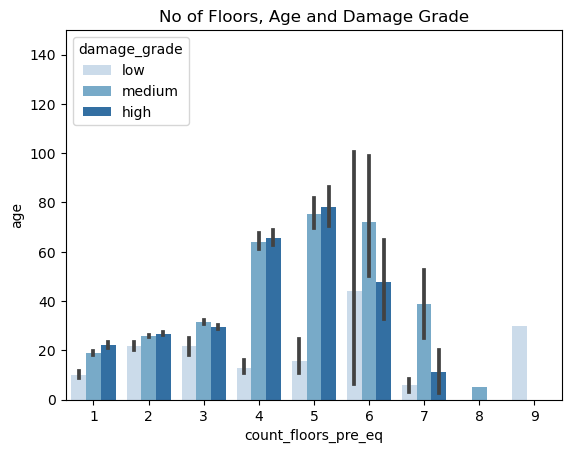

Older houses are more susceptible to Medium to high grade damage


In [3]:
#setting Color palette
base_color=sb.color_palette('bright')[0]
cvc=sb.color_palette("Blues", 3)
# ordering damage grade
order_cat= ['low', 'medium', 'high']
cat_class= pd.api.types.CategoricalDtype(ordered = True, categories = order_cat)
quake['damage_grade']= quake['damage_grade'].astype(cat_class)
sb.barplot(data=quake,x='count_floors_pre_eq', y='age', hue='damage_grade', palette=cvc)
plt.ylim((0, 150))
plt.title('No of Floors, Age and Damage Grade')
plt.show()
print("Older houses are more susceptible to Medium to high grade damage")

## (Visualization 2)



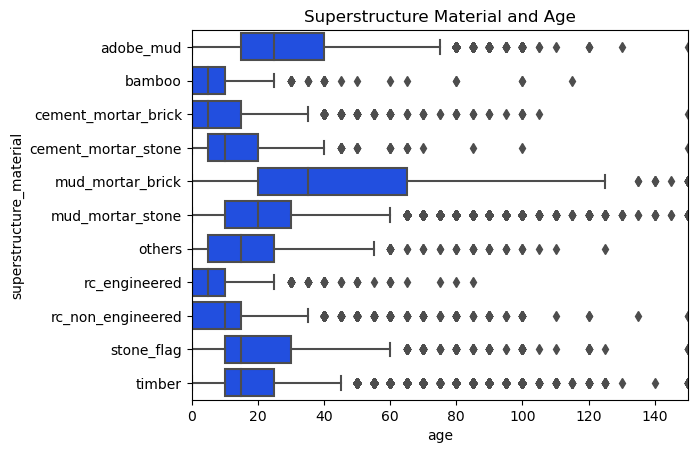

Mud Mortar Stone and Adobe Mud,  and Timber are noted for popularity in the olden years and recent years respectively


In [4]:
# Boxplot of Superstructure Material and Age
sb.boxplot(data=quake, x='age',y='superstructure_material', color=base_color)
plt.xlim((0, 150))
plt.title('Superstructure Material and Age')
plt.show()
print("Mud Mortar Stone and Adobe Mud,  and Timber are noted for popularity in the olden years and recent years respectively")

Houses built with mud brick stone Re more susceptible to greater damage


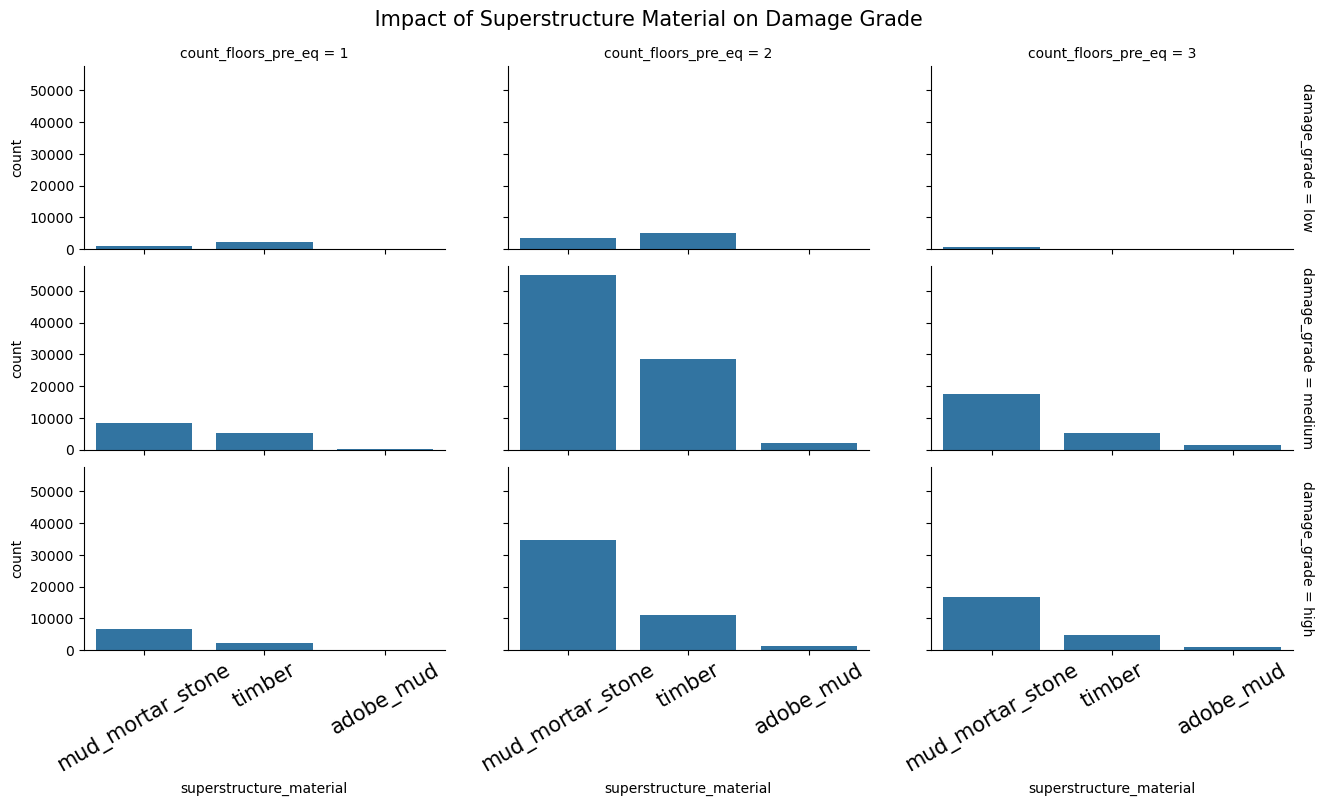

In [5]:
# get  a dataframe of count floors less than 3 and the predominant superstructure material
quake_sub1=quake.loc[quake['superstructure_material'].isin(['mud_mortar_stone', 'adobe_mud', 'timber'])]
quake_sub2=quake_sub1.loc[quake_sub1['count_floors_pre_eq'].isin([1,2,3])]
# get the plot
g = sb.FacetGrid(data = quake_sub2, row= 'damage_grade', col = 'count_floors_pre_eq', height = 3, margin_titles= True)
g.map(sb.countplot, 'superstructure_material', order=[ 'mud_mortar_stone','timber', 'adobe_mud'])
g.set_xticklabels(size= 15, rotation=30)
g.fig.subplots_adjust(top=0.9)
# Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14, 7);
g.fig.suptitle(' Impact of Superstructure Material on Damage Grade', size= 15)
print("Houses built with mud brick stone Re more susceptible to greater damage")

## (Visualization 3)



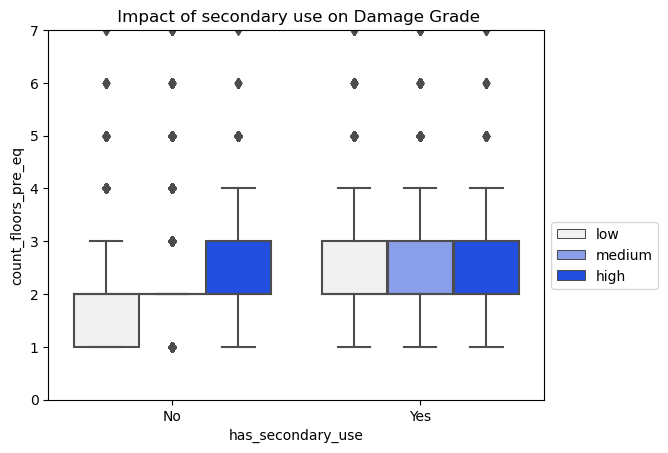

Houses with no use are severely damaged because of the construction material as evident in the previous barchart.
In this boxplot, houses with secondary use specifically suffers medium- high grade damage from the earthquake


In [6]:
# Boxplot of secondary use on Damage Grade
sb.boxplot(data=quake,x='has_secondary_use', y='count_floors_pre_eq', hue='damage_grade',color=base_color)
plt.ylim((0, 7))
plt.legend(bbox_to_anchor=(1.0,0.5))
plt.title(' Impact of secondary use on Damage Grade')
plt.show()
print('Houses with no use are severely damaged because of the construction material as evident in the previous barchart.')
print('In this boxplot, houses with secondary use specifically suffers medium- high grade damage from the earthquake')

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 